# Image Corruption

This notebook provides three different functions for corrupting images. Each procedure outputs and saves the corrupted image and the corresponding corruption mask, which specifies which pixels were corrupted.

This notebook can be run as-is using the files provided together with the notebook. If you would like to use a custom image instead, follow the steps below. 
* Choose an image you would like to use and convert it to the PNG format. Note that only PNG images are supported, as using the JPEG format would cause additoinal pixels to be corrupted. Moreover, avoid using large images, as otherwise the program for solving the corresponding convex program will run slow.
* Place the PNG in the same folder as this notebook. If you are using Colab, upload your image using the 'Files' selection on the left.
* Change the filename in the cell below to that of your image file.
* Run the notebook cells one by one. The output files will be generated in the same folder as this notebook. If you are using Colab, you can find them in the 'Files' menu on the left.

In [17]:
# image_filename = 'eth'  # color version
image_filename = 'eth_gray'  # grayscale version

corruption_percentage = 0.3

In [18]:
import matplotlib.pyplot as plt  # for plotting in Python
import numpy as np  # for number manipulation
import imageio  # for reading and writing images

In [19]:
# Saves pixel data as image with given filename
"""def save_image(data, filename):
    imageio.imwrite(filename, data)"""

def save_image(data, filename):
    # Ensure data is in uint8 format (0-255)
    if data.dtype != np.uint8:
        data = (255 * (data - data.min()) / (data.max() - data.min())).astype(np.uint8)
    
    imageio.imwrite(filename, data)



In [20]:
# Displays two images side-by side
def display_two_images(left_image, right_image, left_image_title='Original Image', right_image_title='Corrupted Image'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(left_image, cmap='gray')
    ax[0].set_title(left_image_title)
    ax[0].axis('off')
    ax[1].imshow(right_image, cmap='gray')
    ax[1].set_title(right_image_title)
    ax[1].axis('off')

## Removing Pixels

The first corruption method sets the color of a random set of pixels to pure black. The random seed can be changed to get different corruption results.

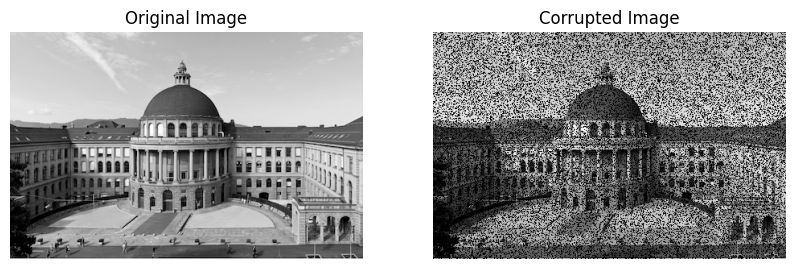

In [21]:
# Set random seed used for corruption
np.random.seed(1)

# Load image and get its size
original = plt.imread(image_filename + '.png')
rows, cols = original.shape[:2]

# Generate corruption mask where each entry is either
# - 0 if pixel was corrupted (occurs with probability corruption_percentage), or
# - 1 if pixel was not corrupted (occurs with probability 1 - corruption_percentage)
mask = np.array([[np.random.choice(np.arange(0, 2), p=[corruption_percentage, 1 - corruption_percentage]) for j in range(cols)] for i in range(rows)])

# Corrupt image according to corruption mask (via element-wise multiplication)
corrupted = np.array([[original[i, j] * mask[i, j] for j in range(cols)] for i in range(rows)])
            
# Save corrupted image and corruption mask
save_image(corrupted, image_filename + '_noise.png')
save_image(mask, image_filename + '_noise_mask.png')

# Display original and corrupted image for comparison
display_two_images(original, corrupted)

# Adding Text

The second corruption method adds text to the image. The text, its position, its color, its size, and its font can be customized.

Note that this method requires a font file in TTF format to be present in the same folder as this notebook. We included the [Roboto-Regular](https://github.com/googlefonts/roboto/blob/master/src/hinted/Roboto-Regular.ttf?raw=true) font together with the notebook, but you may use a different one if you would like. To use a custom font, place the TTF file in the same folder as this notebook (or, in case of Colab, upload it using the 'Files' menu on the left) and the change the `font_filename` variable below.

In [34]:
# Set the text, its position, font size, and font
text_message = 'Can you remove this text using convex optimization?\n It even spans multiple lines!'
#text_message = 'che divertimento fare convex optimisation!'
text_pos = (7, 100)
text_fill = 0
font_size = 15
font_filename = 'Roboto-Regular'

In [35]:
from PIL import Image, ImageFont, ImageDraw  # for image manipulation

In [36]:
# Load font
sized_font = ImageFont.truetype(font_filename + '.ttf', font_size)

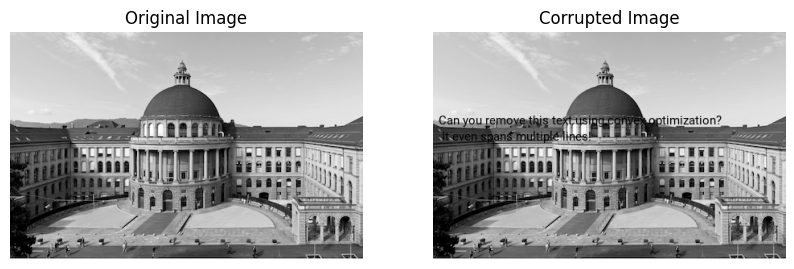

In [37]:
# Load original image
image = Image.open(image_filename + '.png')

# Add text to original image
draw = ImageDraw.Draw(image)
draw.text(text_pos, text=text_message, font=sized_font, fill=text_fill)

# Save corrupted image
image.save(image_filename + '_text.png')

# Reload original and corrupted image
original = plt.imread(image_filename + '.png')
corrupted = plt.imread(image_filename + '_text.png')

# Generate corruption mask (via element-wise comparison)
mask = np.array([[int(np.array_equal(original[i, j], corrupted[i, j])) for j in range(cols)] for i in range(rows)])

# Save corruption mask
save_image(mask, image_filename + '_text_mask.png')

# Display original and corrupted image for comparison
display_two_images(original, corrupted)

# Removing a Rectangle

The final corruption method removes all points from a small rectangle.

In [38]:
# Size and position of rectangle
width, height = 15, 12
x_pos, y_pos = 131, 127

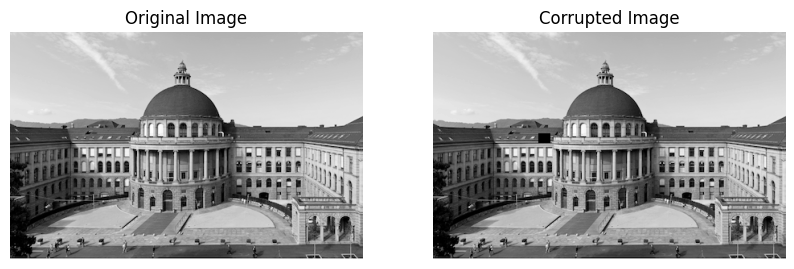

In [39]:
# Load image and get its size
original = plt.imread(image_filename + '.png')
rows, cols = original.shape[:2]

# Generate corruption mask where each entry is either
# - 0 if pixel was corrupted (lies inside rectangle), or
# - 1 if pixel was not corrupted (lies outside rectangle)
mask = np.array([[int(not(i in range(y_pos, y_pos + height) and j in range(x_pos, x_pos + width))) for j in range(cols)] for i in range(rows)])

# Corrupt image according to corruption mask (via element-wise multiplication)
corrupted = np.array([[original[i, j] * mask[i, j] for j in range(cols)] for i in range(rows)])

# Save corrupted image and corruption mask
save_image(corrupted, image_filename + '_rectangle.png')
save_image(mask, image_filename + '_rectangle_mask.png')

# Display original and corrupted image for comparison
display_two_images(original, corrupted)